# Sample for On-Balance Volume (OBV)

In [10]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import re
import yfinance as yf

pattern = re.compile(r'(.+)\.T')
#pattern = re.compile(r'\^(.+)')

symbol = '8306.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='3mo')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-10 00:00:00+09:00,1527.0,1531.0,1514.0,1525.5,39215000,0.0,0.0
2024-10-11 00:00:00+09:00,1539.5,1559.0,1536.0,1552.0,50210400,0.0,0.0
2024-10-15 00:00:00+09:00,1595.0,1599.0,1575.5,1586.5,67380200,0.0,0.0
2024-10-16 00:00:00+09:00,1577.0,1594.5,1569.0,1590.0,43088800,0.0,0.0
2024-10-17 00:00:00+09:00,1600.0,1627.5,1592.0,1620.5,61903700,0.0,0.0


## On-Balance Volume

In [11]:
def calc_obv(r):
    if r == 0:
        return 0

    obv_prev = list_obv[r - 1]
    close_prev = df.iloc[r - 1]['Close']
    close_curr = df.iloc[r]['Close']
    volume_curr = df.iloc[r]['Volume']

    if close_prev < close_curr:
        v_sign = +1
    elif close_prev > close_curr:
        v_sign = -1
    else:
        v_sign = 0

    return obv_prev + volume_curr * v_sign

list_obv = list()
for r in range(len(df)):
    list_obv.append(calc_obv(r))

## Charts

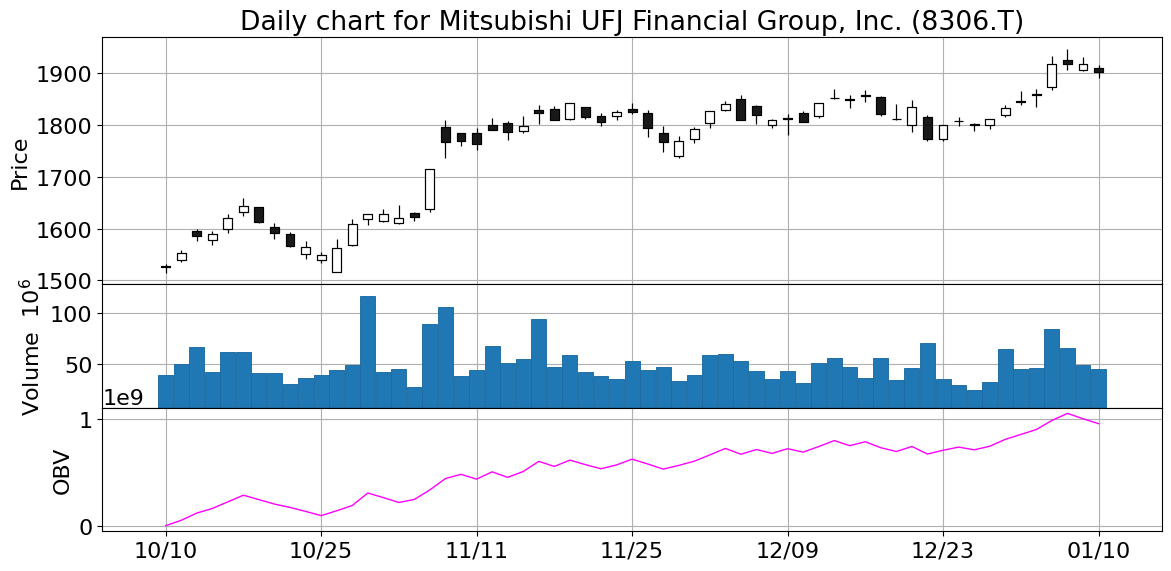

In [12]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))

ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

apds  = [
    mpf.make_addplot(
        list_obv,
        width=1,
        color='magenta',
        ax=ax[2]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m/%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

ax[2].set_ylabel('OBV')

try:
    ax[0].set_title('Daily chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s' % symbol)

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()